<a href="https://colab.research.google.com/github/mayurgite/appliedAI/blob/master/FeatureEngineering_ColumnTranformer_%26_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Index
#### 1. Handling categorical feature

*   Ordinal category
*   Nominal category

#### 2. Column Transformer   
#### 3. Pipeline with Column transformer
#### 4. Model training - LinearRegression

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Enables diagram printing of model
from sklearn import set_config
set_config(display = 'diagram')

In [ ]:
df = pd.DataFrame({
    'Gender' : ['Male','Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female','Male', 'Female','Male', 'Female','Male','Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female','Male', 'Female','Male', 'Female'],
    'Age' : [60, 40, 55, 17, 18, 39, 41, 53, 44, 50, np.nan, 37, 28,30, 41, 49, 37, 33, 27, 32, 59, 30, 38, np.nan, 35, 29],
    'Behaviour' : ['Average','Good', 'Poor', '', 'Good', 'Average', 'Good', 'Average', 'Average', 'Poor', 'Average', 'Poor', 'Good','Average','Good', 'Poor', 'Good', 'Good', 'Average', 'Good', 'Average', 'Average', 'Poor', 'Average', 'Poor', 'Good'],
    'EducationField': ['Medical','Life Sciences', 'Engineering', 'Medical', 'Engineering', 'Medical', 'Life Sciences', 'Medical', 'Life Sciences', 'Engineering', 'Medical', 'Engineering', 'Life Sciences','Medical','Life Sciences', 'Engineering', 'Life Sciences', 'Engineering', 'Medical', 'Life Sciences', 'Medical', 'Life Sciences', 'Engineering', 'Medical', 'Engineering', 'Life Sciences'],
    'MonthlyIncome': [10000, 7569, 5330, 6990, 7809, 9968, 3768, 4270, 9693, 9926, 8737, 2426, 4193,9526, 5993, 5130, 2090, 2909, 3468, 3068, 2670, 2693, 9526, 5237, 2426, 4193]
})

In [ ]:
df.sample(5)

,Gender,Age,Behaviour,EducationField,MonthlyIncome
4,Male,18.0,Good,Engineering,7809
6,Female,41.0,Good,Life Sciences,3768
5,Male,39.0,Average,Medical,9968
24,Male,35.0,Poor,Engineering,2426
18,Male,27.0,Average,Medical,3468


### In given dataframe we have 2 categorical columns
1.   Gender --> Nominal categorical variable
2.   EducationalField --> Nominal categorical variable
3.   Behaviour --> Ordinal categorical variable

#### Luckly we don't have target variable as categorical variable <br>hence no need to LabelEncoding().


In [ ]:
# there is difference between df['Behaviour'] and df[['Behaviour']]
# 1. df['Behaviour'] --> Single pair of brackets returns a Series
# 2. df[['Behaviour']] --> While double brackets return a dataframe.

data = df[['Behaviour']]

In [ ]:
# Let's first convert ordinal varibale into number, as Behaviour column have 
# missing values present hence need to handle in advance, as per class logic 
# we can't use already used categorical numbers hence we are using -1 here.
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories = [['Poor','Average','Good']], dtype = np.int32, handle_unknown='use_encoded_value',unknown_value=-1)

In [ ]:
arr = oe.fit(data[['Behaviour']])
arr

OrdinalEncoder(categories=[['Poor', 'Average', 'Good']],
               dtype=<class 'numpy.int32'>, handle_unknown='use_encoded_value',
               unknown_value=-1)

In [ ]:
arr.categories_

[array(['Poor', 'Average', 'Good'], dtype=object)]

In [ ]:
output = arr.transform(data)

In [ ]:
data.head()

,Behaviour
0,Average
1,Good
2,Poor
3,NaN
4,Good


In [ ]:
pd.DataFrame(output)

,0
0,1
1,2
2,0
3,-1
4,2
5,1
6,2
7,1
8,1
9,0


<br><br>
### **Nominal encoding/OneHotEncoding**
#### So when data categories don't have any order then we can go ahead with OneHotEncoding


In [ ]:
df.sample(5)

,Gender,Age,Behaviour,EducationField,MonthlyIncome
25,Female,29.0,Good,Life Sciences,4193
22,Male,38.0,Poor,Engineering,9526
12,Female,28.0,Good,Life Sciences,4193
7,Male,53.0,Average,Medical,4270
18,Male,27.0,Average,Medical,3468


In [ ]:
# Here 'Gender' and 'EducationField' are 2 Nominal categorical featues

# This feature have 2 unique values
df.EducationField.value_counts()

Medical          9
Life Sciences    9
Engineering      8
Name: EducationField, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', dtype=np.int32)

In [ ]:
ohe.fit(df[['Gender','EducationField']])

ohe.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Engineering', 'Life Sciences', 'Medical'], dtype=object)]

In [ ]:
out =  ohe.transform(df[['Gender','EducationField']])
out

<26x5 sparse matrix of type '<class 'numpy.int32'>'
	with 52 stored elements in Compressed Sparse Row format>

In [ ]:
df.head()

,Gender,Age,Behaviour,EducationField,MonthlyIncome
0,Male,60.0,Average,Medical,10000
1,Female,40.0,Good,Life Sciences,7569
2,Male,55.0,Poor,Engineering,5330
3,Male,17.0,NaN,Medical,6990
4,Male,18.0,Good,Engineering,7809


In [ ]:
pd.DataFrame(out.toarray(),columns=['Gender_ohe1','Gender_ohe2','EducationField_ohe_1','EducationField_ohe_2','EducationField_ohe_3'])

,Gender_ohe1,Gender_ohe2,EducationField_ohe_1,EducationField_ohe_2,EducationField_ohe_3
0,0,1,0,0,1
1,1,0,0,1,0
2,0,1,1,0,0
3,0,1,0,0,1
4,0,1,1,0,0
5,0,1,0,0,1
6,1,0,0,1,0
7,0,1,0,0,1
8,1,0,0,1,0
9,0,1,1,0,0


<br><br>
###  **ColumnTransformer**
#### sklearn.compose.ColumnTransformer() -> single transformer
#### By using ColumnTransformer() we can perform various operations in single function

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
col_trans = ColumnTransformer(transformers=[
      ('ord_tr',
          OrdinalEncoder(unknown_value = -1, 
                        handle_unknown='use_encoded_value',
                        categories=[['Poor','Average','Good']], dtype=np.int32),
                ['Behaviour']),

      ('one_tr',
          OneHotEncoder(dtype=np.int32,
                        sparse=False,
                        drop='first'),
                ['Gender','EducationField'])],
  remainder = 'passthrough')

In [ ]:
transformed = col_trans.fit_transform(df)

In [ ]:
trn_df = pd.DataFrame(transformed, columns=['Behaviour','Gender','EducationField_1','EducationField_2','Age','MonthlyIncome'])

In [ ]:
trn_df.sample(5)

,Behaviour,Gender,EducationField_1,EducationField_2,Age,MonthlyIncome
10,1.0,0.0,0.0,1.0,NaN,8737.0
14,2.0,0.0,1.0,0.0,41.0,5993.0
20,1.0,1.0,0.0,1.0,59.0,2670.0
18,1.0,1.0,0.0,1.0,27.0,3468.0
21,1.0,0.0,1.0,0.0,30.0,2693.0


<br><br>

### **Pipeline**
#### In this section we are going to use pipeline to create our model.

In [ ]:
# In this dataframe "MonthlyIncome" is dependent variable i.e. y.
# Now our problem statement is to predict salary of input data point.
df.sample(5)

,Gender,Age,Behaviour,EducationField,MonthlyIncome
21,Female,30.0,Average,Life Sciences,2693
7,Male,53.0,Average,Medical,4270
20,Male,59.0,Average,Medical,2670
1,Female,40.0,Good,Life Sciences,7569
2,Male,55.0,Poor,Engineering,5330


In [ ]:
# Let's check for null values
df.isnull().sum()

Gender            0
Age               2
Behaviour         1
EducationField    0
MonthlyIncome     0
dtype: int64

In [ ]:
# First let's split data as train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['MonthlyIncome']),df['MonthlyIncome'], train_size=0.5)

In [ ]:
X_train.shape

(13, 4)

In [ ]:
X_test.shape

(13, 4)

In [ ]:
X_train.head(10)

,Gender,Age,Behaviour,EducationField
9,Male,50.0,Poor,Engineering
18,Male,27.0,Average,Medical
8,Female,44.0,Average,Life Sciences
13,Male,30.0,Average,Medical
11,Male,37.0,Poor,Engineering
19,Female,32.0,Good,Life Sciences
22,Male,38.0,Poor,Engineering
17,Male,33.0,Good,Engineering
12,Female,28.0,Good,Life Sciences
23,Female,NaN,Average,Medical


### We have 3 different preprocessing steps to do
1. As 'Age' and 'Behaviour' columns have null value hence need to use imputer.

2. 'Age' & 'MonthlyIncome' columns are numeric but they are having different scaling.

3. 'Gender','Behaviour' and 'EducationField' are categorical columns hence use encoder.





In [ ]:
# 1. Let's build first column transformer which can impute missing values
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

imputer_trans = ColumnTransformer(transformers=[('age_imp',SimpleImputer(missing_values=np.nan),[1]),
                                                ('behaviour_imp',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),[2])],
                                  remainder = 'passthrough')

In [ ]:
imp_col_tran = pd.DataFrame(imputer_trans.fit_transform(X_train))
imp_col_tran

,0,1,2,3
0,50,Poor,Male,Engineering
1,27,Average,Male,Medical
2,44,Average,Female,Life Sciences
3,30,Average,Male,Medical
4,37,Poor,Male,Engineering
5,32,Good,Female,Life Sciences
6,38,Poor,Male,Engineering
7,33,Good,Male,Engineering
8,28,Good,Female,Life Sciences
9,38.3333,Average,Female,Medical


In [ ]:
# 2. Let's scale age numerical column
from sklearn.preprocessing import StandardScaler

scalar_trans = ColumnTransformer(transformers= [
                                    ('age_scale',StandardScaler(),[0])
                                    #('income_scale',StandardScaler(),[4])
  # Scaling output variable is not necessary
  # Refer - https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re
                                    
], remainder = 'passthrough')

In [ ]:
# 3. Let's encode categorical columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

encoder_trans = ColumnTransformer(transformers = [
                                    ('behave_encode',OrdinalEncoder(categories=[['Poor','Average','Good']], dtype=np.int32),[1]),
                                    ('gender_encode', OneHotEncoder(drop='first', dtype= np.int32, sparse= False),[2]),
                                    ('edu_encode', OneHotEncoder(drop='first', dtype= np.int32, sparse= False),[3])   
                                ],
                remainder = 'passthrough')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
                 ('imputer_trans',imputer_trans),
                 ('scalar_trans',scalar_trans),
                 ('encoder_trans',encoder_trans),
                 ('reg',LinearRegression())
])

In [ ]:
# Training pipeline with train data, we are also going to train model in same pipeline hence we are not using tranform here.
# So we will use predict method instead with X_test instead of fit_tranform on same data.
pipe = pipe.fit(X_train,y_train)

In [ ]:
# accuracy_score is being used for classification task not for regression task.
#from sklearn.metrics import accuracy_score

y_pred = pipe.predict(X_test)
print(y_pred)

[5091.26451194 1299.89539415 5237.         5091.26451194 4646.24423019
 5054.17948846 7614.59926067 4942.92441802 7068.15116395 6057.02827455
 7651.68428414 6699.98461385 7441.68508342]


In [ ]:
from sklearn.metrics import r2_score

my_r2_score = r2_score(y_test,y_pred)

print('R2 score = ', my_r2_score)

R2 score =  -0.712934853473824


In [ ]:
from sklearn.metrics import mean_absolute_error

abs_mean_err = mean_absolute_error(y_test,y_pred)

print('Mean absolute error: ', abs_mean_err)

Mean absolute error:  2849.3693329849293


In [ ]:
from sklearn.metrics import mean_squared_error
import math
mean_s_err = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', math.sqrt(mean_s_err))

Mean Squared Error:  3334.593964097669


In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


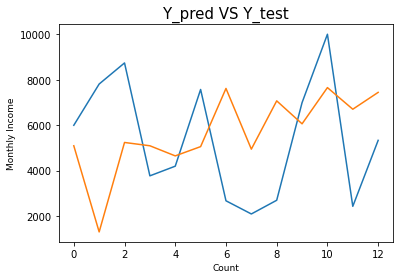

In [ ]:
sns.lineplot(range(y_test.size), y_test)
sns.lineplot(range(y_pred.size), y_pred)

plt.title("Y_pred VS Y_test", fontsize = 15) # for title
plt.xlabel("Count", fontsize = 9) # label for x-axis
plt.ylabel("Monthly Income", fontsize = 9) # label for y-axis
plt.show()

In [ ]:
y_test.size

13